# MNIST HANDWRITING

Deep Learning for MNIST Handwritten Digit Classification using PyTorch.
This is an exploration task. Develop your end-to-end workflow for solving
a Handwritten Digit Classification task using Neural Network architecture
(not Convolutional Neural Network). These are the criteria for scoring:


In [ ]:
#Import all libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

###1. Loading your MNIST dataset for the data loader

In [ ]:
# Step 1: Load MNIST dataset for the data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)

mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 29509006.39it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 55617857.59it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38808409.35it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12165088.61it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



###2. Visualize several MNIST datasets

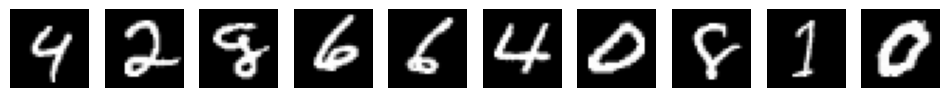

In [ ]:
# Step 2: Visualize several MNIST datasets

import matplotlib.pyplot as plt
%matplotlib inline

#define a functon to plot images
def plot_images(images):
  fig, axs = plt.subplots(1, len(images), figsize=(12, 6))
  for i, image in enumerate(images):
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].axis('off')

#get some images
images, labels = next(iter(train_loader))
plot_images(images[:10])

###3. Design your Neural Network model

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 50)
    self.final = nn.Linear(50, 10)
    self.relu = nn.ReLU()

  def forward(self, img):
    x = img.view(-1, 28*28)
    x = self.relu(self.linear1(x))
    x = self.relu(self.linear2(x))
    x = self.final(x)
    return x

net = Net()

###4. Setup your hyperparameter such as Loss Function, Optimizer, Learning Rate, etc

In [ ]:
cross_el = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
epoch = 20

###5. Develop a training loop and run a training model

In [ ]:
for epoch in range(epoch):
  net.train()
  running_loss = 0.0

  for data in train_loader:
    x, y = data
    optimizer.zero_grad()
    output = net(x.view(-1, 28*28))
    loss = cross_el(output, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f'[{epoch + 1}, {epoch + 1:5d}] loss : {running_loss / 2000:.5f}')

[1,     1] loss : 0.20647
[2,     2] loss : 0.10130
[3,     3] loss : 0.07721
[4,     4] loss : 0.06303
[5,     5] loss : 0.05435
[6,     6] loss : 0.04740
[7,     7] loss : 0.04242
[8,     8] loss : 0.03799
[9,     9] loss : 0.03543
[10,    10] loss : 0.03259
[11,    11] loss : 0.03001
[12,    12] loss : 0.02792
[13,    13] loss : 0.02512
[14,    14] loss : 0.02513
[15,    15] loss : 0.02297
[16,    16] loss : 0.02233
[17,    17] loss : 0.02027
[18,    18] loss : 0.01906
[19,    19] loss : 0.01832
[20,    20] loss : 0.01807


###6. Evaluate the Model using several performance metrics such as accuracy, confusion matrix, F1 Score, Precision, Recall, etc

In [ ]:
# Step 6: Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

accuracy = accuracy_score(all_labels, all_predictions)
confusion = confusion_matrix(all_labels, all_predictions)
classification_report_str = classification_report(all_labels, all_predictions)

print(f"Accuracy: {accuracy * 100}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)

Accuracy: 97.53%
Confusion Matrix:
[[ 963    0    3    0    0    0    7    3    4    0]
 [   0 1129    0    1    0    1    2    1    1    0]
 [   3    2 1009    4    1    0    3    5    5    0]
 [   0    0    8  987    0    2    0    5    7    1]
 [   0    1    8    0  965    0    3    2    2    1]
 [   4    0    0    7    1  855   10    1   13    1]
 [   4    2    3    0    2    4  942    0    1    0]
 [   1    5   15    4    2    1    1  991    1    7]
 [   5    0    5    2    2    0    5    3  950    2]
 [   1    2    0    4   21    4    2    2   11  962]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.97      0.9

###7. Describe and explain your Result

Menurut saya, melihat dari hasil permodelan Deep Learning dalam Machine Learning MNIST, untuk menganalisa / memprediksi tulisan tangan, memiliki hasil persentasi yang increase sejalan dengan banyaknya data yang di train dan testing.